In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
print("Step 1: Loading the sales dataset...")
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nColumn names:\n{df.columns.tolist()}")

Step 1: Loading the sales dataset...
Dataset shape: (2823, 25)

First few rows:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue     

In [14]:
numerical_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
X = df[numerical_features].copy()

print(f"Selected features: {numerical_features}")
print(f"Feature matrix shape: {X.shape}")
print(f"\nFeature statistics:\n{X.describe()}")

# Check for missing values
print(f"\nMissing values:\n{X.isnull().sum()}")
if X.isnull().sum().sum() > 0:
    X = X.dropna()
    print(f"Rows with missing values removed. New shape: {X.shape}")
else:
    print("No missing values found.")

Selected features: ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
Feature matrix shape: (2823, 4)

Feature statistics:
       QUANTITYORDERED    PRICEEACH         SALES         MSRP
count      2823.000000  2823.000000   2823.000000  2823.000000
mean         35.092809    83.658544   3553.889072   100.715551
std           9.741443    20.174277   1841.865106    40.187912
min           6.000000    26.880000    482.130000    33.000000
25%          27.000000    68.860000   2203.430000    68.000000
50%          35.000000    95.700000   3184.800000    99.000000
75%          43.000000   100.000000   4508.000000   124.000000
max          97.000000   100.000000  14082.800000   214.000000

Missing values:
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
MSRP               0
dtype: int64
No missing values found.


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
print("Testing cluster numbers from 1 to 10...")

inertias = []
k_range = range(1, 11)

Testing cluster numbers from 1 to 10...


In [18]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

k=1: Inertia = 11292.00
k=2: Inertia = 6741.69
k=3: Inertia = 4766.01
k=4: Inertia = 3934.89
k=5: Inertia = 3348.27
k=6: Inertia = 2858.82
k=7: Inertia = 2548.54
k=8: Inertia = 2350.66
k=9: Inertia = 2169.97
k=10: Inertia = 2019.75


Step 6: Plotting the Elbow Curve...


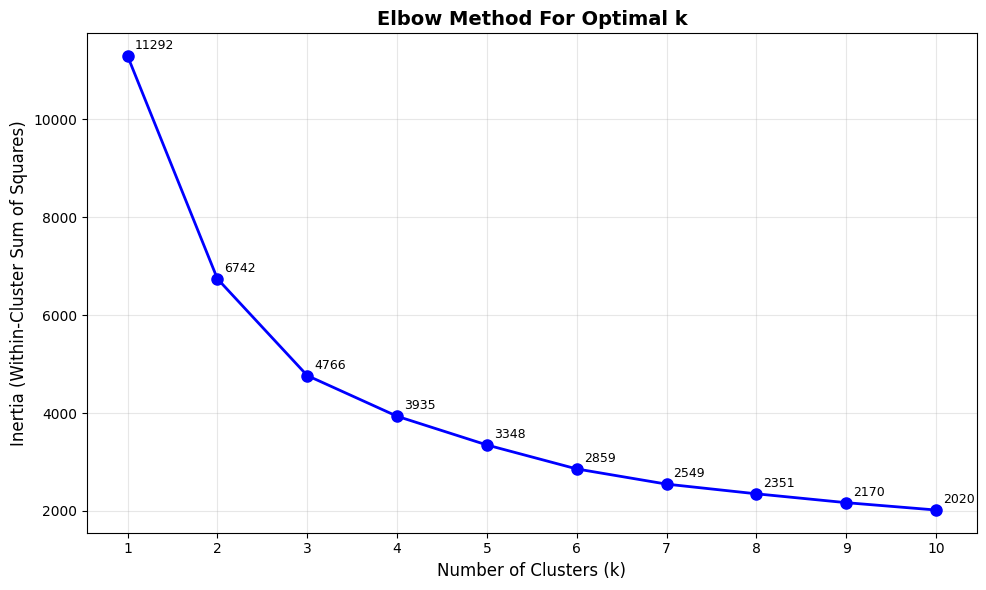

In [19]:
print("Step 6: Plotting the Elbow Curve...")
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Add annotations
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    plt.annotate(f'{inertia:.0f}', 
                xy=(k, inertia), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()

plt.show()

In [20]:
optimal_k = 3  # Based on elbow curve observation
print(f"Step 7: Performing K-Means clustering with k={optimal_k}...")
print("(Choose k where the curve starts to flatten - the 'elbow' point)")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

print(f"\nClustering completed!")
print(f"Cluster distribution:\n{pd.Series(clusters).value_counts().sort_index()}")


Step 7: Performing K-Means clustering with k=3...
(Choose k where the curve starts to flatten - the 'elbow' point)

Clustering completed!
Cluster distribution:
0    975
1    852
2    996
Name: count, dtype: int64


In [21]:
print("Step 8: Analyzing cluster characteristics...")
print("\nCluster Centers (scaled values):")
print(kmeans_final.cluster_centers_)

print("\nCluster Statistics (original values):")
for i in range(optimal_k):
    print(f"\n--- Cluster {i} ({sum(clusters == i)} samples) ---")
    cluster_data = df[df['Cluster'] == i][numerical_features]
    print(cluster_data.describe().round(2))


Step 8: Analyzing cluster characteristics...

Cluster Centers (scaled values):
[[ 0.01184799 -1.19516781 -0.78891227 -0.9101341 ]
 [ 0.8864113   0.68548355  1.17752688  0.67787228]
 [-0.76819238  0.58369319 -0.23358667  0.31144577]]

Cluster Statistics (original values):

--- Cluster 0 (975 samples) ---
       QUANTITYORDERED  PRICEEACH    SALES    MSRP
count           975.00     975.00   975.00  975.00
mean             35.21      59.55  2101.08   64.15
std               8.97      13.76   737.91   18.97
min              11.00      26.88   482.13   33.00
25%              28.00      49.71  1518.00   53.00
50%              35.00      61.18  2031.40   62.00
75%              43.00      70.62  2633.34   72.00
max              64.00      95.03  4086.29  151.00

--- Cluster 1 (852 samples) ---
       QUANTITYORDERED  PRICEEACH     SALES    MSRP
count           852.00     852.00    852.00  852.00
mean             43.72      97.48   5720.08  127.89
std               6.84       6.38   1576.81   3

Step 9: Visualizing clusters...
Cluster visualization saved as 'cluster_visualization.png'


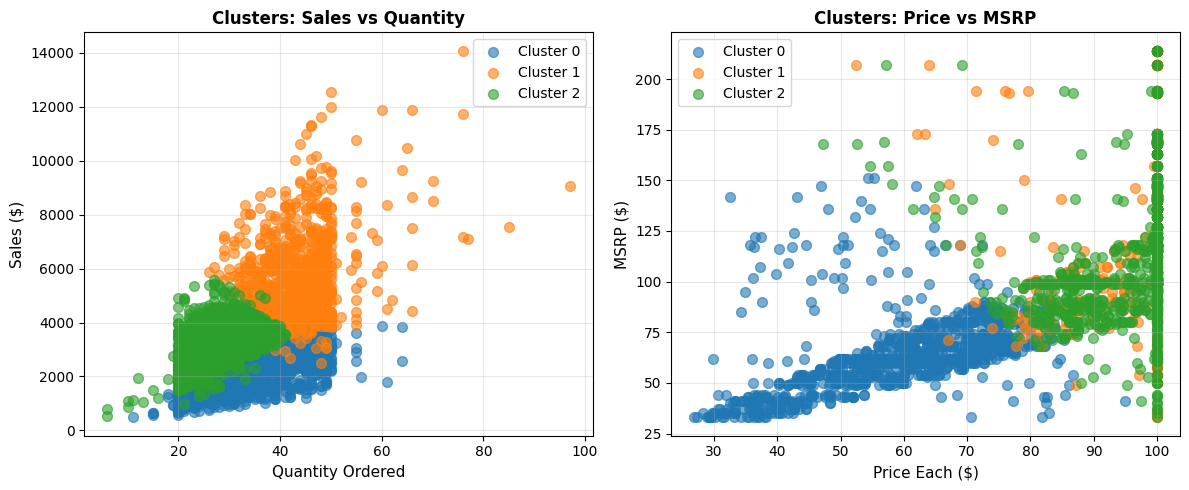

In [22]:
print("Step 9: Visualizing clusters...")
plt.figure(figsize=(12, 5))

# Plot 1: SALES vs QUANTITYORDERED
plt.subplot(1, 2, 1)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['QUANTITYORDERED'], 
               cluster_points['SALES'],
               label=f'Cluster {i}',
               alpha=0.6,
               s=50)
plt.xlabel('Quantity Ordered', fontsize=11)
plt.ylabel('Sales ($)', fontsize=11)
plt.title('Clusters: Sales vs Quantity', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: PRICEEACH vs MSRP
plt.subplot(1, 2, 2)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['PRICEEACH'], 
               cluster_points['MSRP'],
               label=f'Cluster {i}',
               alpha=0.6,
               s=50)
plt.xlabel('Price Each ($)', fontsize=11)
plt.ylabel('MSRP ($)', fontsize=11)
plt.title('Clusters: Price vs MSRP', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
print("Cluster visualization saved as 'cluster_visualization.png'")
plt.show()

In [23]:
print("SUMMARY OF K-MEANS CLUSTERING")
print("="*60)
print(f"Dataset: Sales Data ({df.shape[0]} samples)")
print(f"Features used: {numerical_features}")
print(f"Optimal number of clusters: {optimal_k}")
print(f"Final inertia: {kmeans_final.inertia_:.2f}")
print(f"\nCluster sizes:")
for i in range(optimal_k):
    count = sum(clusters == i)
    percentage = (count / len(clusters)) * 100
    print(f"  Cluster {i}: {count} samples ({percentage:.1f}%)")

SUMMARY OF K-MEANS CLUSTERING
Dataset: Sales Data (2823 samples)
Features used: ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
Optimal number of clusters: 3
Final inertia: 4766.01

Cluster sizes:
  Cluster 0: 975 samples (34.5%)
  Cluster 1: 852 samples (30.2%)
  Cluster 2: 996 samples (35.3%)
